Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


#### Reading Dataset and Feature elimination

In [272]:
from google.colab import files
files.upload()

Saving bank.csv to bank (5).csv


{'bank.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,34,10,0,2,1

In [273]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import sklearn     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import zscore
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
#clustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering 

In [274]:
data = pd.read_csv('bank.csv')
data = data.drop_duplicates()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [276]:
print (data.shape)
print (data.shape[0],'rows',data.shape[1],'columns')

(10000, 14)
10000 rows 14 columns


In [277]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [278]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [279]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [280]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [281]:
#Dropping columns 'RowNumber' and	'CustomerId',	 because they are all unique. 
#Dropping column 'Surname' because it does not add useful information.
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [282]:
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

There is an imbalance of classes. Around 20% of customers exited the bank.

In [283]:
print("*********Money that exited the bank when cusomers churned:************\n")
print("Total account balance exited the bank")
print(data.Balance[data.Exited == 1].sum())
print("Mean account balance per churned customer")
print(data.Balance[data.Exited == 1].mean())
print("Compare to normal transactions:")
print("Total account balance of current customers")
print(data.Balance[data.Exited == 0].sum())
print("Mean account balance of current customers")
print(data.Balance[data.Exited == 0].mean())

*********Money that exited the bank when cusomers churned:************

Total account balance exited the bank
185588094.63
Mean account balance per churned customer
91108.53933726063
Compare to normal transactions:
Total account balance of current customers
579270798.25
Mean account balance of current customers
72745.29677885193


Customers who left the bank had higher account balance on average than those who stayed.

#### Perform an Exploratory Data Analysis on the data



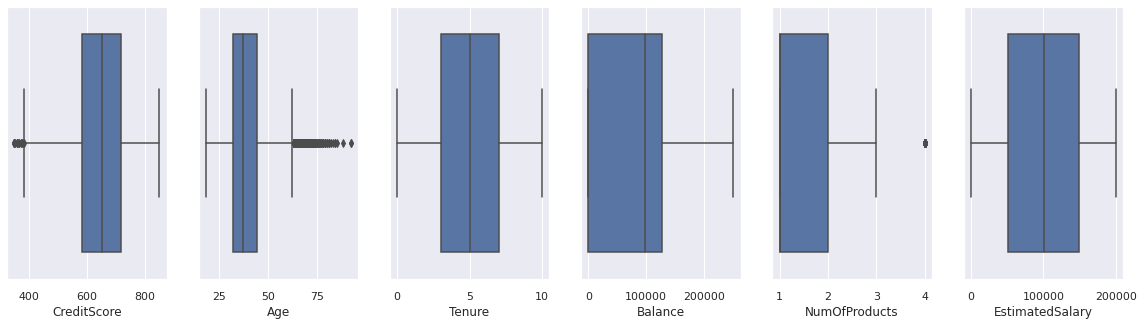

In [284]:
# Boxplots
plt.figure(figsize= (20,5))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']:
    plt.subplot(1, 6, pos)
    sns.boxplot(data[i])
    pos+= 1

There are outliers in variables CreditScore, Age and NumOfProducts

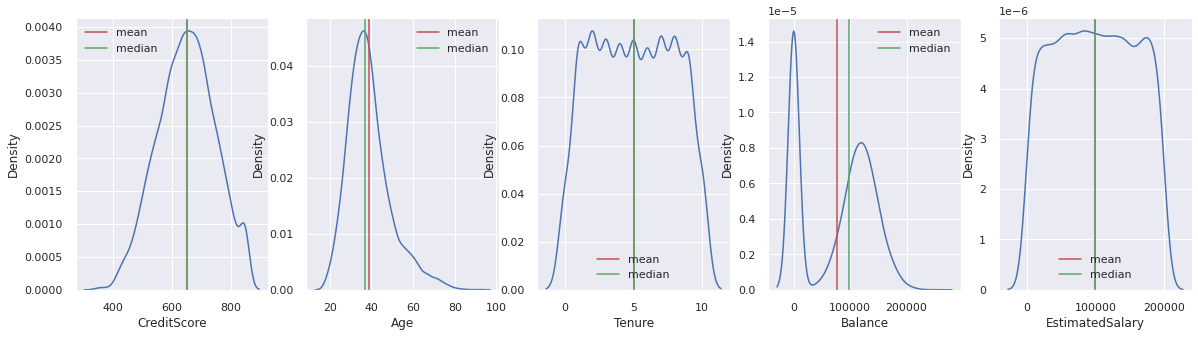

In [285]:
# Displots
plt.figure(figsize= (20,5))
pos = 1 # index each of the plots and plot over the grid one by one
for i in ['CreditScore','Age','Tenure','Balance', 'EstimatedSalary']:
    plt.subplot(1, 5, pos)
    sns.distplot(data[i],hist=False,kde=True)
    plt.axvline(data[i].mean(),color='r',label= 'mean')
    plt.axvline(data[i].median(),color='g',label= 'median')
    plt.legend()
    pos+= 1    

In [286]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


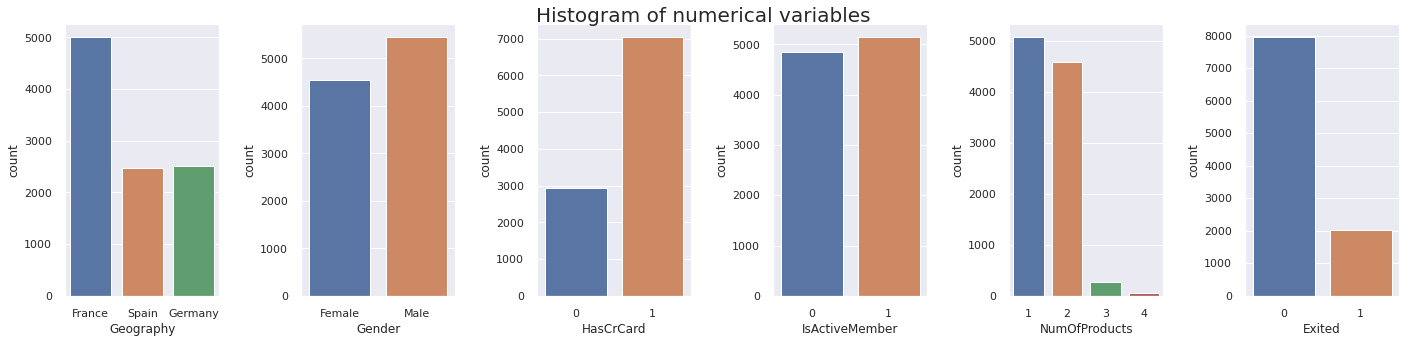

In [287]:
all_col2 = ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Exited']
fig, axes = plt.subplots(1, 6,  figsize=(20, 5))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(6):
    sns.countplot(ax=axes[ii],x=data[all_col2[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

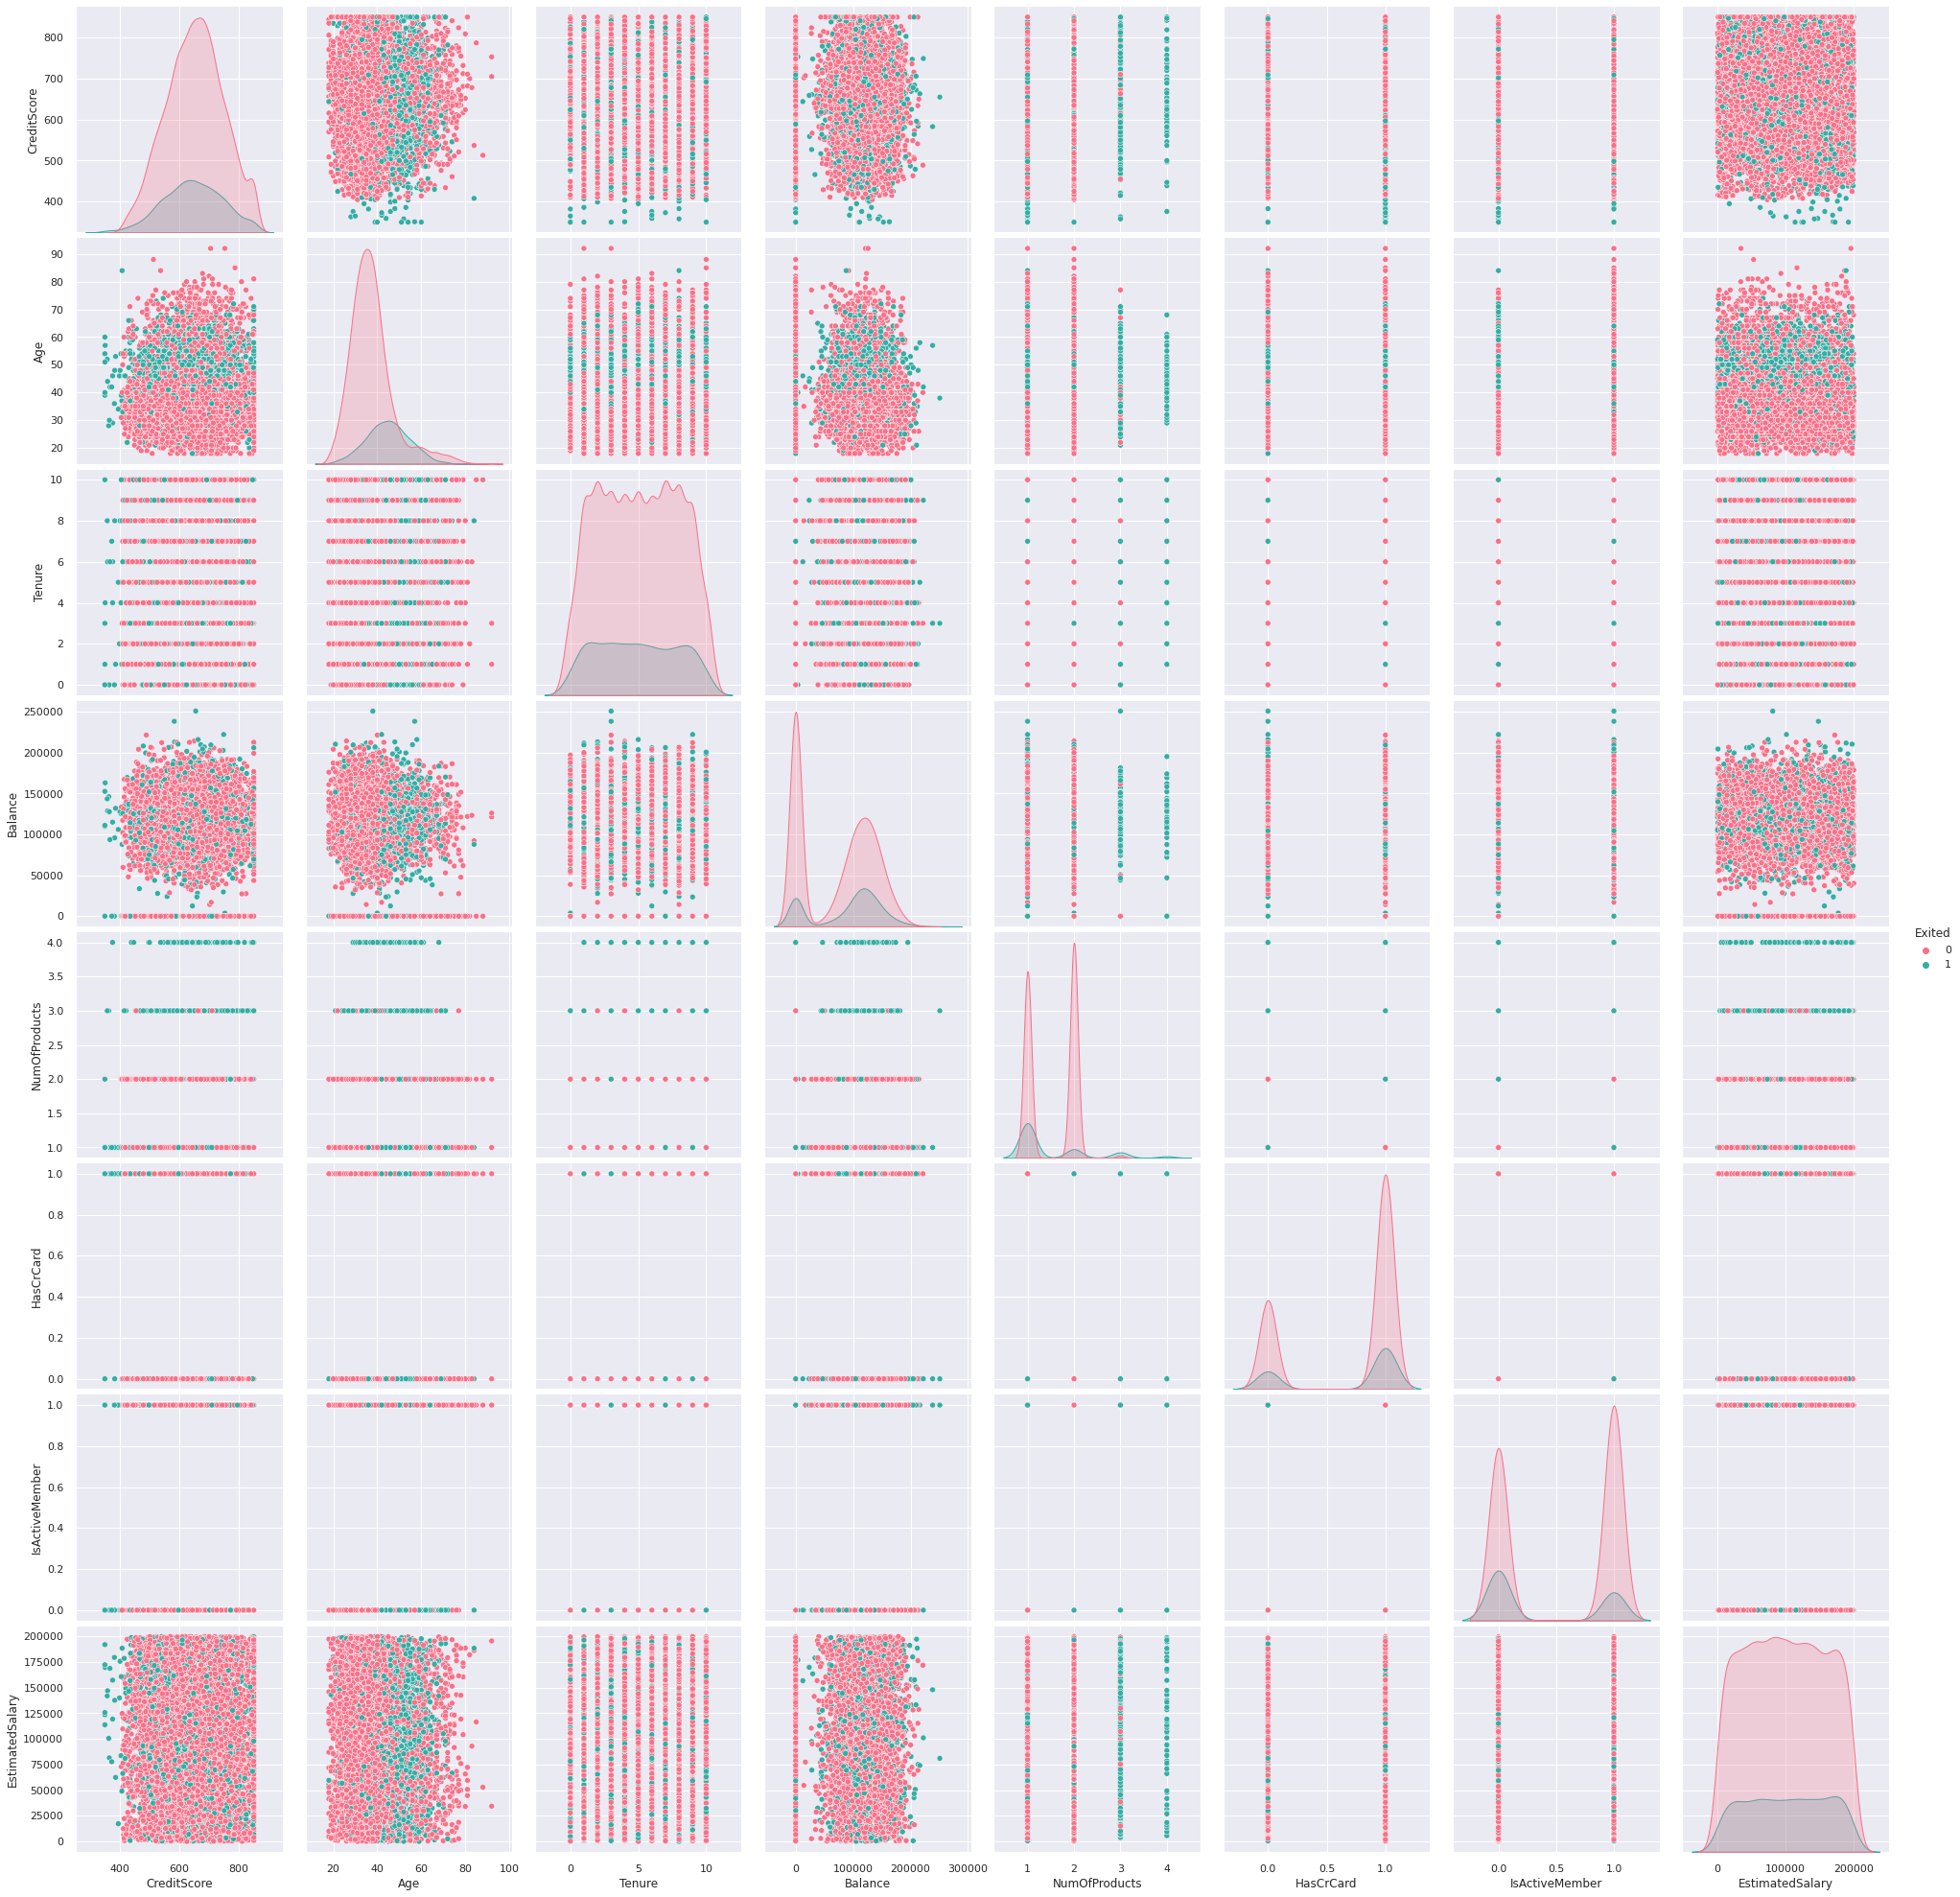

In [288]:
sns.pairplot(data,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

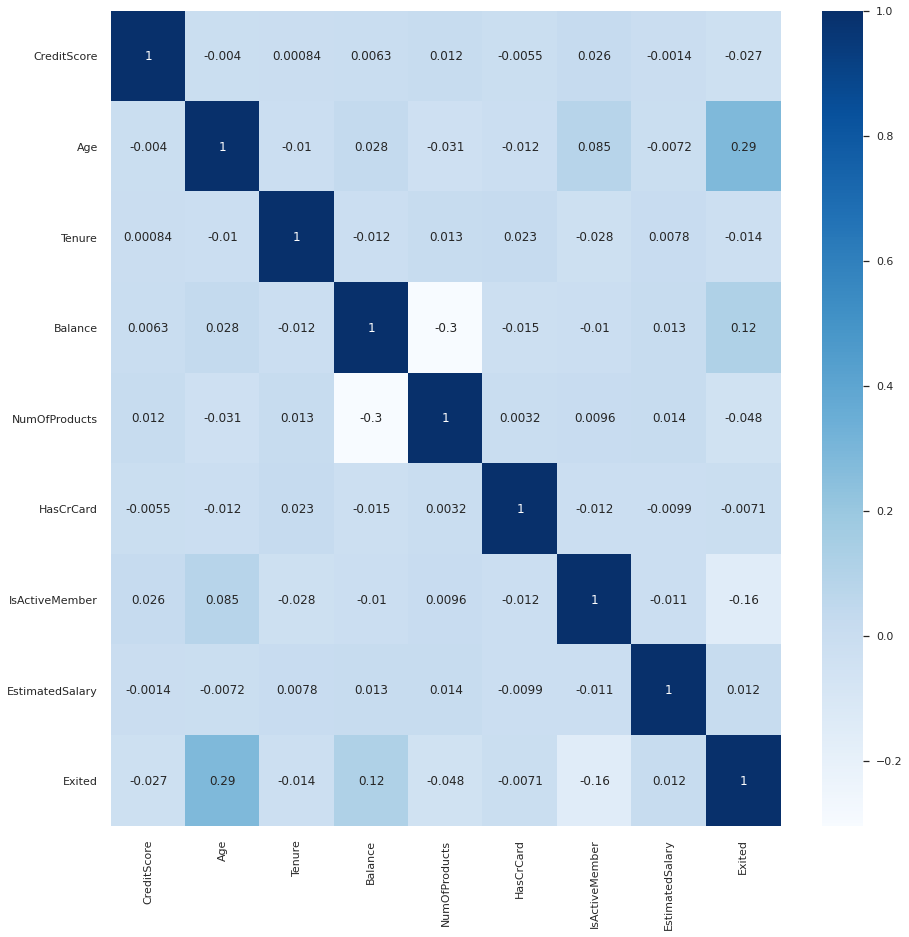

In [289]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),cmap="Blues",ax=ax,annot=True)

In [290]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Exited'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Exited'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


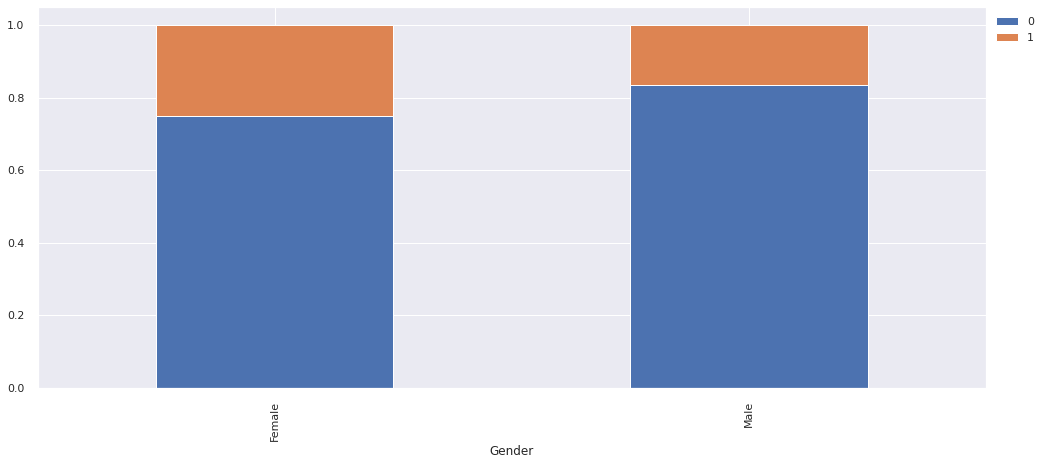

In [291]:
stacked_plot(data['Gender'])

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


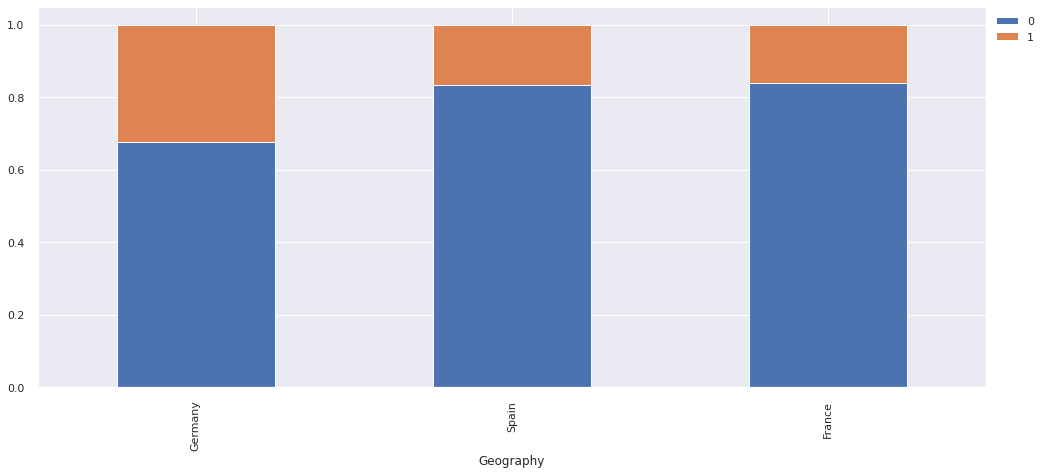

In [292]:
stacked_plot(data['Geography'])

In [293]:
def plot(x,target='Exited'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution Current Customers')
    sns.distplot(data[(data[target] == 0 )][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution Churned Customers')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t target')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t target - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

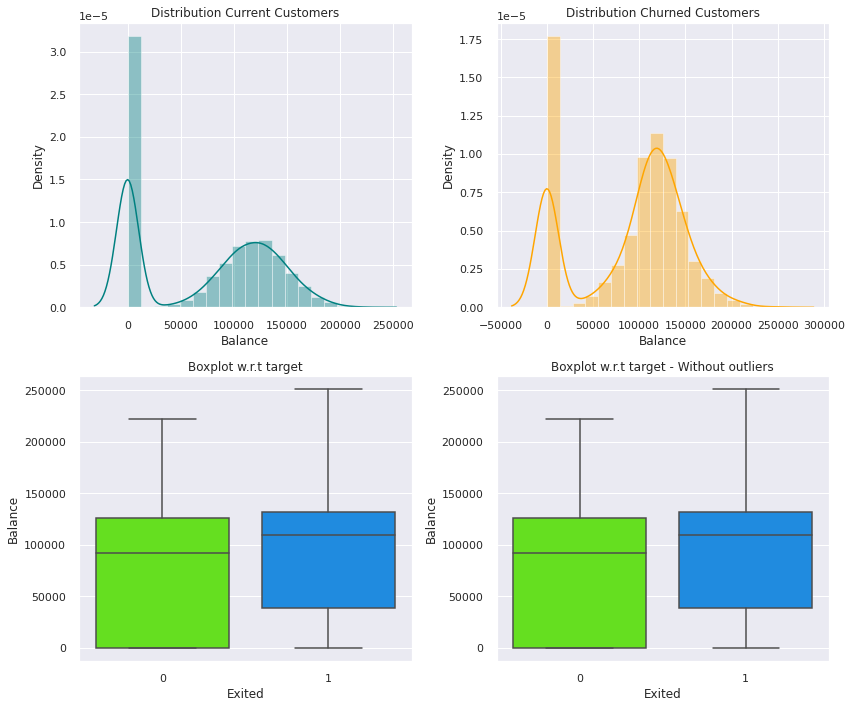

In [294]:
plot('Balance')

#### Illustrate the insights based on EDA <br>


'Age' attribute shows right skew with outliers present. Additionally, 'CreditScore' and 'NumOfProducts' contain outliers as well. The variable 'Balance' is bi-modal, with 2 distinct distributions centering at 0 and around 110K. <br>
This could mean that there are 2 populations of customers: those with no balance and those with average balance of $110.
There appear to be quite significant differences in scales of the variables. This will need to be addressed for further analysis.

20% of customers exited the bank. Those who exited tended to have the following characteristics: <br>
- Age between 40 and 60 years old
- Male
- Customers from Germany 
- Higher on average balance.
- Customers who are using 3-4 products of the bank (On average all customers use 1-2 products of the bank). <br>
Overall, exiting customers represent a lucrative segment for the bank. 


#### Outliers:

In [295]:
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                          

lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

CreditScore         0.15
Age                 3.59
Tenure              0.00
Balance             0.00
NumOfProducts       0.60
HasCrCard           0.00
IsActiveMember      0.00
EstimatedSalary     0.00
Exited             20.37
dtype: float64

In [296]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 
data_out.shape # Around 77% of data does not contain outliers.

(7677, 11)

In [297]:
# Finding outliers in CreditScore column
CreditScore_z = pd.DataFrame({'zscore':np.abs(stats.zscore(data.CreditScore))})
CreditScore_outliers = CreditScore_z.index[CreditScore_z.zscore>3].tolist()
print('there are',len(CreditScore_outliers),'points in CreditScore column that may be considered as outliers')
CreditScore_outliers_df = pd.DataFrame(data.iloc[CreditScore_outliers]['CreditScore'])
CreditScore_outliers_df.value_counts()

there are 8 points in CreditScore column that may be considered as outliers


CreditScore
350            5
359            1
358            1
351            1
dtype: int64

In [298]:
Age_z = pd.DataFrame({'zscore':np.abs(stats.zscore(data.Age))})
Age_outliers = Age_z.index[Age_z.zscore>3].tolist()
print('there are',len(Age_outliers),'points in Age column that may be considered as outliers')
Age_outliers_df = pd.DataFrame(data.iloc[Age_outliers]['Age'])
Age_outliers_df.value_counts()

there are 133 points in Age column that may be considered as outliers


Age
71     27
72     21
74     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
88      1
82      1
83      1
85      1
dtype: int64

In [299]:
NumOfProducts_z = pd.DataFrame({'zscore':np.abs(stats.zscore(data.NumOfProducts))})
NumOfProducts_outliers = NumOfProducts_z.index[NumOfProducts_z.zscore>3].tolist()
print('there are',len(NumOfProducts_outliers),'points in NumOfProducts column that may be considered as outliers')
NumOfProducts_outliers_df = pd.DataFrame(data.iloc[NumOfProducts_outliers]['NumOfProducts'])
NumOfProducts_outliers_df.value_counts()

there are 60 points in NumOfProducts column that may be considered as outliers


NumOfProducts
4                60
dtype: int64

#### Note:
Variables 'CreditScore', 'Age' and 'NumOfProducts' together contain approximately 4% outliers. 'Exited' has 20% outliers. There are relationships in data observed linking older customers with higher NumOfProducts more likely exiting the bank. Additionally, this type of data with some kurtosis occurs naturally in banking industry and algorhythms need to learn from those patterns. Therefore, I decided to not to treat the outliers.

#### Data Pre-processing


In [300]:
X_data = data.drop(['Exited'], axis=1)
y_data = data.iloc[:, 8]
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [301]:
#Columns 'Geography' and 'Gender' are categorical. Making these columns numerical using One Hot Encoding 
#creating dummy variables for the categorical features
X_data = pd.get_dummies(X_data,drop_first=True)
X_data = X_data.astype('float32') 
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,1.0,0.0


In [302]:
scaler = preprocessing.MinMaxScaler()
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [304]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


Model 1

In [305]:
#initialize the model
model = Sequential()

In [306]:
model.add(Dense(units=8, input_dim = 11,activation='relu'))   
model.add(Dense(units=12,activation='relu'))
#Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
# Adding the output layer
model.add(Dense(1,activation='sigmoid'))                       

In [307]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_35 (Dense)             (None, 12)                108       
_________________________________________________________________
dropout_11 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_37 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
________________________________________________________

In [308]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 3ms/step - loss: 1998.4673 - accuracy: 0.4993 - val_loss: 31.7236 - val_accuracy: 0.5156
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 57.4552 - accuracy: 0.4833 - val_loss: 43.7013 - val_accuracy: 0.4944
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 31.8081 - accuracy: 0.5167 - val_loss: 11.1808 - val_accuracy: 0.4931
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 41.8972 - accuracy: 0.4834 - val_loss: 27.6525 - val_accuracy: 0.5144
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 27.4674 - accuracy: 0.4964 - val_loss: 6.7307 - val_accuracy: 0.5144
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 30.7272 - accuracy: 0.5002 - val_loss: 5.3559 - val_accuracy: 0.4944
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 32.5122 - accuracy: 0.5125 - val_loss: 27.6166 - val_accuracy:

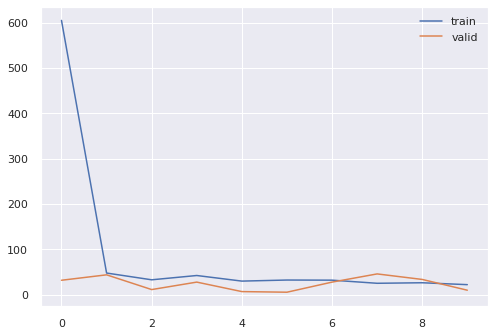

In [309]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [310]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 9.5352 - accuracy: 0.5010


In [311]:
print(score)


[9.535170555114746, 0.5009999871253967]


In [312]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

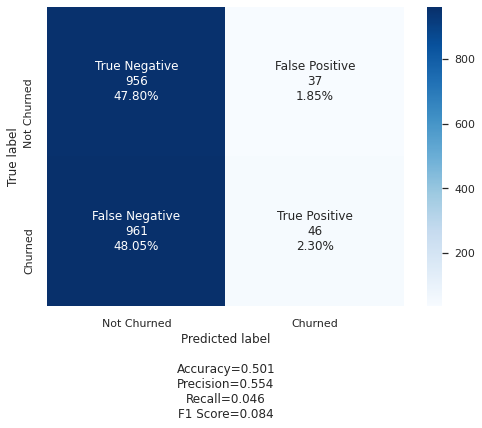

In [313]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Churned','Churned']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [314]:
yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = model.predict_classes(X_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)

ROC AUC: 0.521475


Model2

In [315]:

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_shape=(11, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/40
10/10 [==============================] - 1s 39ms/step - loss: 31427.3533 - accuracy: 0.5125 - val_loss: 5723.0127 - val_accuracy: 0.4956
Epoch 2/40
10/10 [==============================] - 0s 8ms/step - loss: 25441.6834 - accuracy: 0.5190 - val_loss: 3496.5156 - val_accuracy: 0.5100
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 22137.5676 - accuracy: 0.5042 - val_loss: 2458.4077 - val_accuracy: 0.5000
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 18727.3778 - accuracy: 0.4903 - val_loss: 1889.4363 - val_accuracy: 0.5044
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 16308.8208 - accuracy: 0.4900 - val_loss: 2545.6553 - val_accuracy: 0.5125
Epoch 6/40
10/10 [==============================] - 0s 6ms/step - loss: 14375.7127 - accuracy: 0.4911 - val_loss: 2387.0557 - val_accuracy: 0.5131
Epoch 7/40
10/10 [==============================] - 0s 8ms/step - loss: 11566.0974 - accuracy: 0.5023 - val_loss: 188

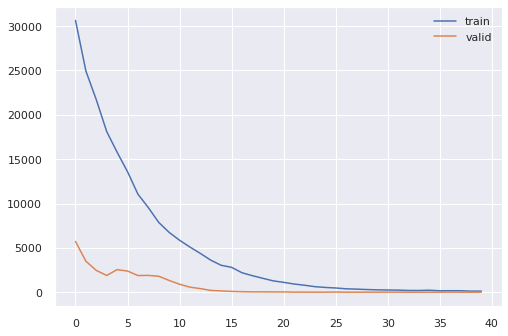

In [316]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

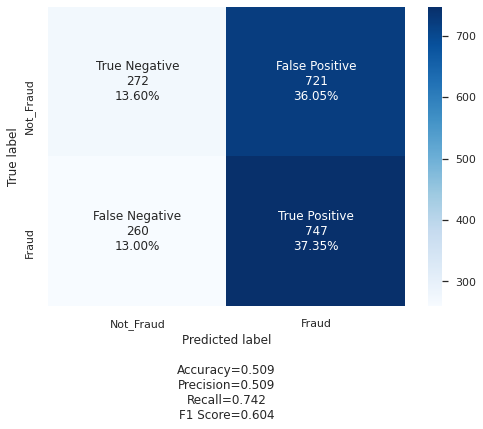

In [317]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')


In [318]:
auc2 = roc_auc_score(y_test, y_pred1)
print('ROC AUC: %f' % auc2)

ROC AUC: 0.507862


#Model Improvement: Adding Weights

In [319]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 1.037344398340249, 1: 0.9652509652509652}

In [320]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
534/534 [==============================] - 2s 2ms/step - loss: 19.2609 - accuracy: 0.5005
Epoch 2/5
534/534 [==============================] - 1s 2ms/step - loss: 21.1286 - accuracy: 0.4996
Epoch 3/5
534/534 [==============================] - 1s 2ms/step - loss: 17.1913 - accuracy: 0.4991
Epoch 4/5
534/534 [==============================] - 1s 2ms/step - loss: 12.2649 - accuracy: 0.4959
Epoch 5/5
534/534 [==============================] - 1s 2ms/step - loss: 11.0162 - accuracy: 0.5107


In [321]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 991us/step - loss: 3.4444 - accuracy: 0.5030


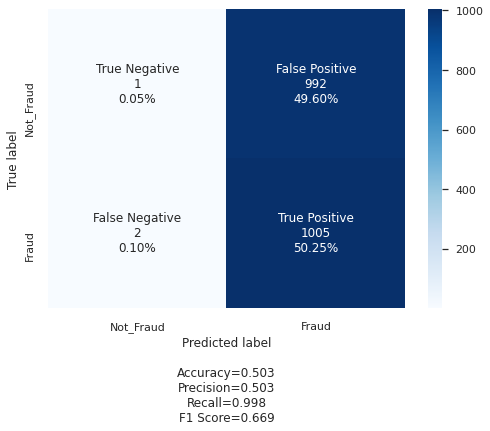

In [322]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [323]:
auc3 = roc_auc_score(y_test, y_pred1)
print('ROC AUC: %f' % auc3)

ROC AUC: 0.499510


#### Model Performance Evaluation
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement

3 Models were built:<br>
- Model 1 produced the following metrics:
Accuracy 0.501, <br>
precision 0.554, <br> 
Recall 0.046, <br>
F1 score 0.084<br>
Roc AUC 0.52 <br>

- Model 2 produced the following metrics:
Accuracy 0.509, <br>
precision 0.509, <br> 
Recall 0.742, <br>
F1 score 0.604<br>
Roc AUC 0.507 <br>

- Model 3 produced the following metrics:
Accuracy 0.503, <br>
precision 0.503, <br> 
Recall 0.998, <br>
F1 score 0.669<br>
Roc AUC 0.499 <br>

With respect to Recall the best model is the model that assigns weight (Model 3 based on Model 1). However, accuracy and precision could be further tuned by applying resampling techniques, 
evaluating threashold or hyperparameter tuning.

#### Conclusion and key takeaways
- Final conclusion about the analysis

There is potential to further improve the model from the machine learning perspective. On the business side, there is an opportunity to further research why 20% of high value customers left the bank. <br>
Potentially, the bank could start from surveying the customers to understand experience and service expectations of the following customer segment:
- Between 40 and 60 years old
- Male 
- Customers from Germany
- Higher on average balance (50k - 200k)
- Customers who are using more than 2 products of the bank 